# ทำการเตรียมข้อมูล

In [2]:
from typing import Tuple, List
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocess data
# โหลดข้อมูลหุ้น (ตัวอย่าง)
nvidia = pd.read_csv("nvidia_10yr_data.csv", parse_dates=["Date"])
apple = pd.read_csv("AAPL_10yr_data.csv", parse_dates=["Date"])
tesla = pd.read_csv("TSLA_10yr_data.csv", parse_dates=["Date"])



nvidia['Date'] = pd.to_datetime(nvidia['Date'], format="%d/%m/%Y")
apple['Date'] = pd.to_datetime(apple['Date'], format="%d/%m/%Y")
tesla['Date'] = pd.to_datetime(tesla['Date'], format="%d/%m/%Y")


nvidia = nvidia.sort_values("Date")
apple = apple.sort_values("Date")
tesla = tesla.sort_values("Date")


# Feature engineering
# สร้างฟีเจอร์ใหม่จากข้อมูลหุ้น


# สร้างฟีเจอร์ใหม่จากข้อมูลหุ้น NVIDIA
nvidia['Return'] = nvidia['Close'].pct_change()
nvidia['Volatility'] = nvidia['Close'].rolling(10).std()
nvidia['Price_Diff'] = nvidia['High'] - nvidia['Low']
nvidia['Volume_Log'] = np.log1p(nvidia['Volume'])

# สร้างฟีเจอร์ใหม่จากข้อมูลหุ้น Apple
apple['Return'] = apple['Close'].pct_change()
apple['Volatility'] = apple['Close'].rolling(10).std()
apple['Price_Diff'] = apple['High'] - apple['Low']
apple['Volume_Log'] = np.log1p(apple['Volume'])


# สร้างฟีเจอร์ใหม่จากข้อมูลหุ้น Tesla
tesla['Return'] = tesla['Close'].pct_change()
tesla['Volatility'] = tesla['Close'].rolling(10).std()
tesla['Price_Diff'] = tesla['High'] - tesla['Low']
tesla['Volume_Log'] = np.log1p(tesla['Volume'])



# Drop NaN หลัง rolling
nvidia.dropna(inplace=True)
apple.dropna(inplace=True)
tesla.dropna(inplace=True)


# Combine data for modeling

X_nvidia = nvidia[['Return', 'Volatility', 'Price_Diff', 'Volume_Log']]
y_nvidia = nvidia['Close']

X_apple = apple[['Return', 'Volatility', 'Price_Diff', 'Volume_Log']]
y_apple = apple['Close']

X_tesla = tesla[['Return', 'Volatility', 'Price_Diff', 'Volume_Log']]
y_tesla = tesla['Close']

# ทำการ แสดงสถิติพื้นฐาน

In [ ]:
nvidia

,Date,Close,High,Low,Open,Volume,Return,Volatility,Price_Diff,Volume_Log
9,2015-01-15,0.470347,0.479946,0.470107,0.477066,188932000,-0.007092,0.007403,0.009839,19.056898
10,2015-01-16,0.478986,0.479466,0.468187,0.469627,181512000,0.018367,0.006822,0.011279,19.016832
11,2015-01-20,0.480426,0.484985,0.474427,0.482346,140308000,0.003006,0.007315,0.010559,18.759351
12,2015-01-21,0.487145,0.488345,0.474427,0.477786,144780000,0.013986,0.007406,0.013918,18.790726
13,2015-01-22,0.495544,0.496984,0.483066,0.488105,159712000,0.017241,0.007769,0.013918,18.888883
...,...,...,...,...,...,...,...,...,...,...
2511,2024-12-24,140.197372,141.877094,138.627619,139.977407,105157000,0.003938,4.204134,3.249475,18.470965
2512,2024-12-26,139.907410,140.827275,137.707768,139.677451,116205600,-0.002068,4.282715,3.119507,18.570872
2513,2024-12-27,136.987885,138.997570,134.688268,138.527645,170582600,-0.020868,4.262276,4.309302,18.954730
2514,2024-12-30,137.467804,140.247354,133.998363,134.808230,167734700,0.003503,4.340256,6.248991,18.937894


In [27]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 2507 entries, 9 to 2515
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2507 non-null   datetime64[ns]
 1   Close       2507 non-null   float64       
 2   High        2507 non-null   float64       
 3   Low         2507 non-null   float64       
 4   Open        2507 non-null   float64       
 5   Volume      2507 non-null   int64         
 6   Return      2507 non-null   float64       
 7   Volatility  2507 non-null   float64       
 8   Price_Diff  2507 non-null   float64       
 9   Volume_Log  2507 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 215.4 KB


,Date,Close,High,Low,Open,Volume,Return,Volatility,Price_Diff,Volume_Log
count,2507,2507.000000,2507.000000,2507.000000,2507.000000,2.507000e+03,2507.000000,2507.000000,2507.000000,2507.000000
mean,2020-01-07 07:43:32.046270208,20.859809,21.239172,20.446820,20.862257,4.685661e+08,0.002719,0.786341,0.792351,19.852080
min,2015-01-15 00:00:00,0.460748,0.472650,0.454509,0.463628,5.244800e+07,-0.187559,0.002267,0.004356,17.775333
25%,2017-07-12 12:00:00,3.564024,3.630799,3.507512,3.578667,3.065700e+08,-0.012435,0.081562,0.078402,19.540957
50%,2020-01-08 00:00:00,6.502590,6.567391,6.379738,6.472079,4.165640e+08,0.002660,0.227448,0.237788,19.847551
75%,2022-07-05 12:00:00,21.305758,21.900414,20.878770,21.260217,5.645260e+08,0.017642,0.822411,0.825545,20.151497
max,2024-12-31 00:00:00,148.845734,152.854800,146.226298,149.315621,3.692928e+09,0.298067,10.722555,13.345791,22.029685
std,NaN,32.349410,32.952650,31.709453,32.386954,2.535790e+08,0.030649,1.376827,1.428890,0.466172


In [12]:
print(df['Date'].min())  # วันที่เก่าที่สุด
print(df['Date'].max())  # วันที่ใหม่ที่สุด
print(len(df))           # จำนวนแถวทั้งหมด

2015-01-15 00:00:00
2024-12-31 00:00:00
2507


In [7]:
print(df['Date'].dtype)  # ควรแสดง datetime64[ns]
print(df['Date'].head())  # ดูรูปแบบวันที่

object
1217    1/11/2019
1720    1/11/2021
1972    1/11/2022
2223    1/11/2023
2475    1/11/2024
Name: Date, dtype: object


In [73]:
# ตรวจ missing
print(df.isnull().sum())

# ค่าที่ซ้ำกัน
df.duplicated().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


np.int64(0)

In [74]:
df.describe()

,Date,Close,High,Low,Open,Volume
count,2516,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,2019-12-31 19:03:31.764706048,20.786881,21.164913,20.375351,20.789328,4.676480e+08
min,2015-01-02 00:00:00,0.459308,0.467947,0.454509,0.463628,5.244800e+07
25%,2017-07-02 06:00:00,3.545036,3.594863,3.449813,3.515635,3.055120e+08
50%,2020-01-01 00:00:00,6.482601,6.539911,6.338270,6.440887,4.151695e+08
75%,2022-06-30 06:00:00,21.228698,21.733422,20.806877,21.166934,5.640210e+08
max,2024-12-31 00:00:00,148.845734,152.854800,146.226298,149.315621,3.692928e+09
std,NaN,32.314417,32.916986,31.675142,32.351868,2.536131e+08


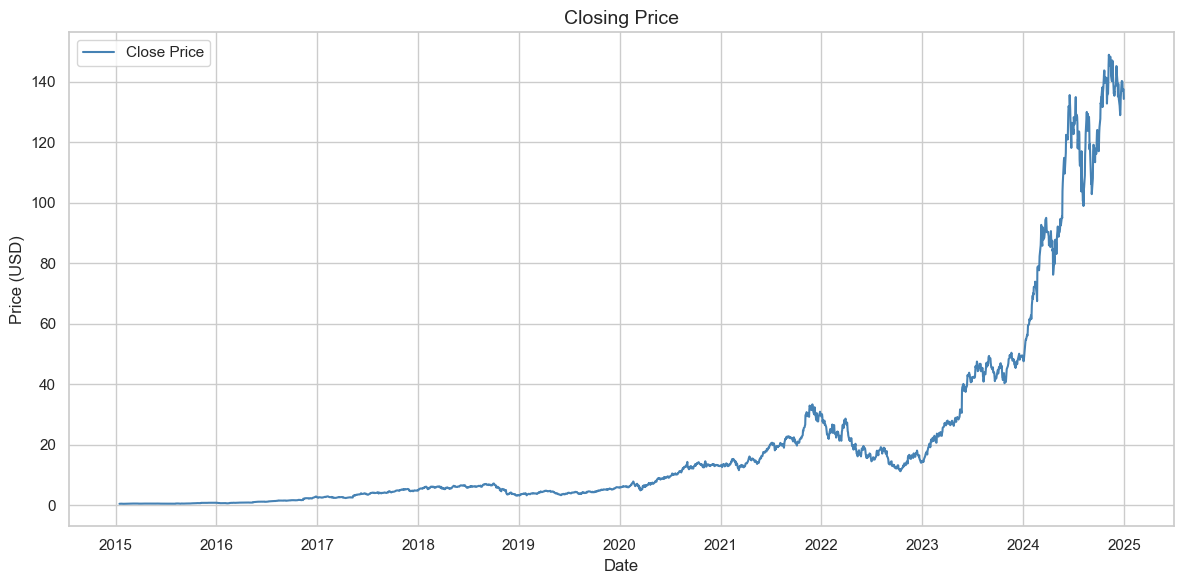

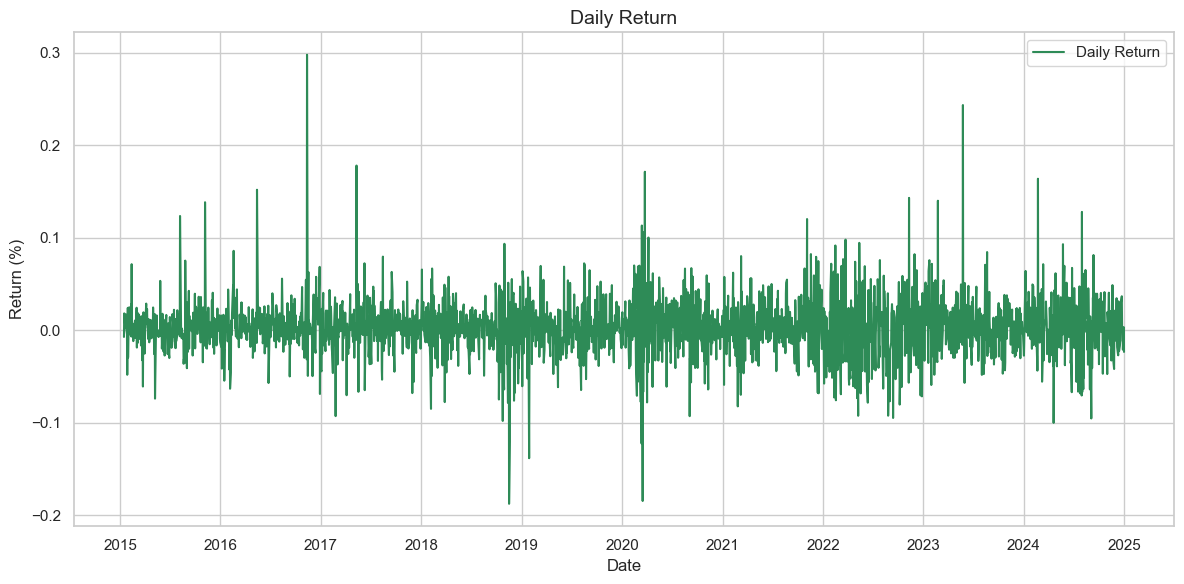

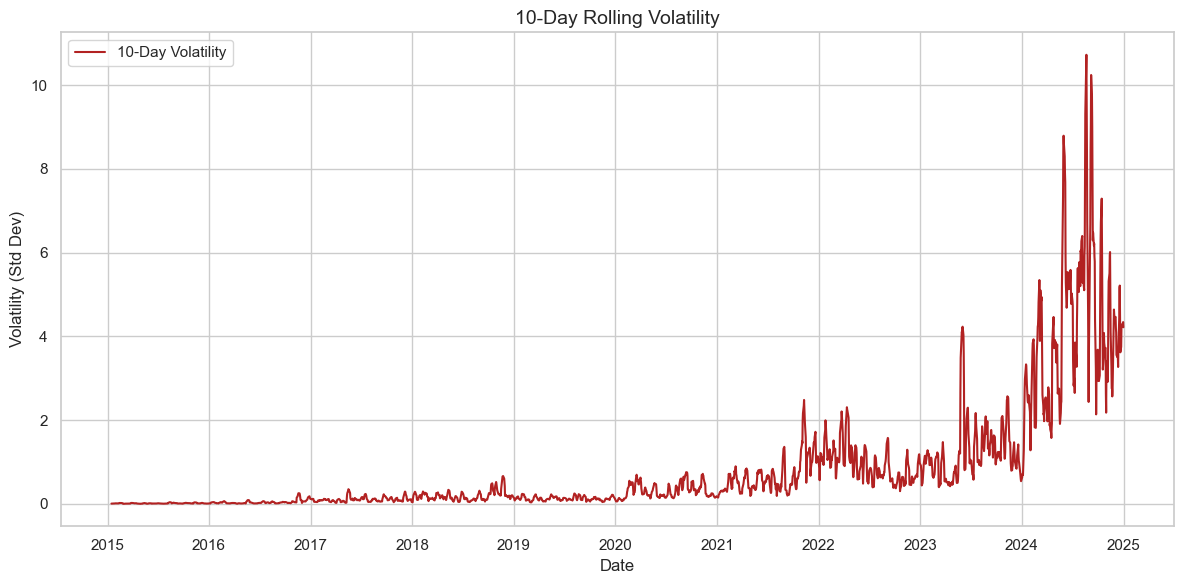

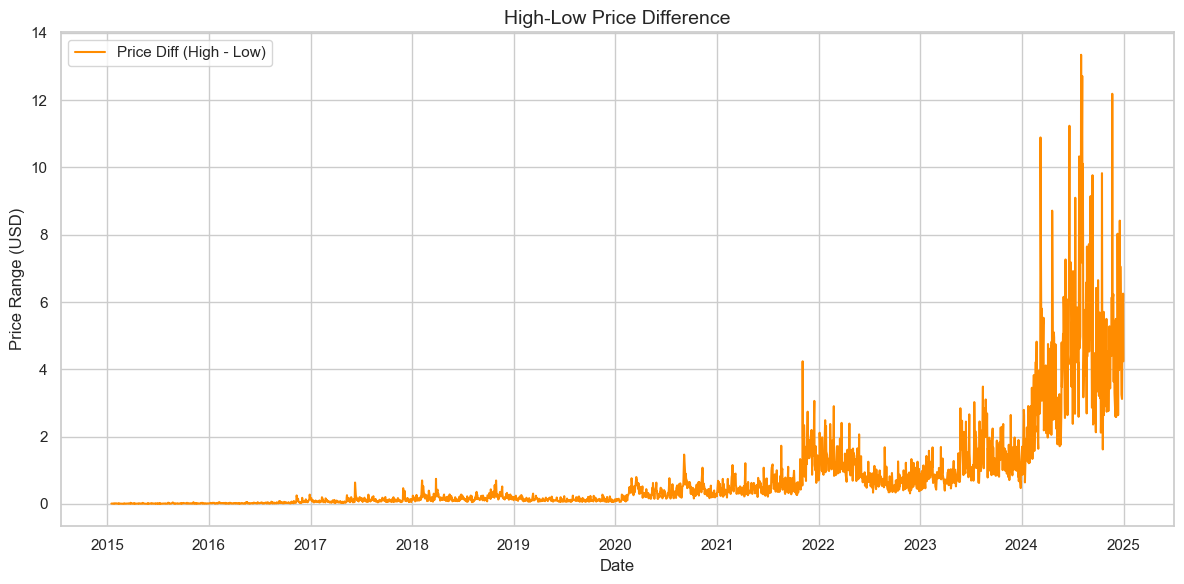

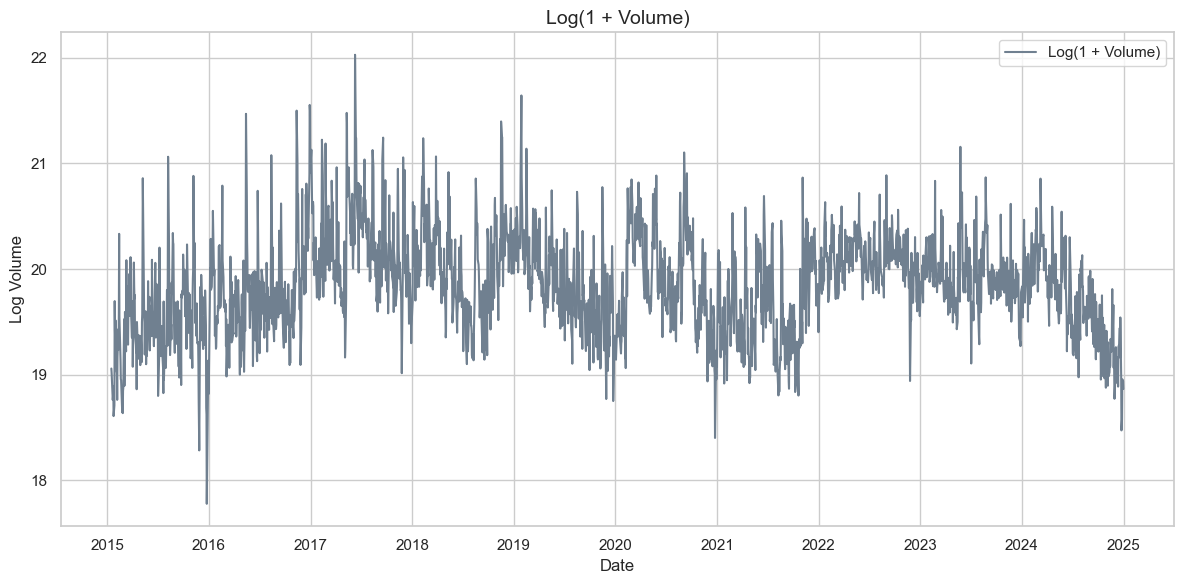

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  # ใช้ธีมสวยงาม

# Plot 1: Closing Price
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Close', color='steelblue', linewidth=1.5, label='Close Price')
plt.title("Closing Price", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot 2: Daily Return
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Return', color='seagreen', linewidth=1.5, label='Daily Return')
plt.title("Daily Return", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Return (%)", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot 3: 10-Day Rolling Volatility
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Volatility', color='firebrick', linewidth=1.5, label='10-Day Volatility')
plt.title("10-Day Rolling Volatility", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volatility (Std Dev)", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot 4: High-Low Price Difference
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Price_Diff', color='darkorange', linewidth=1.5, label='Price Diff (High - Low)')
plt.title("High-Low Price Difference", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price Range (USD)", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot 5: Log Volume
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Volume_Log', color='slategray', linewidth=1.5, label='Log(1 + Volume)')
plt.title("Log(1 + Volume)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Log Volume", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


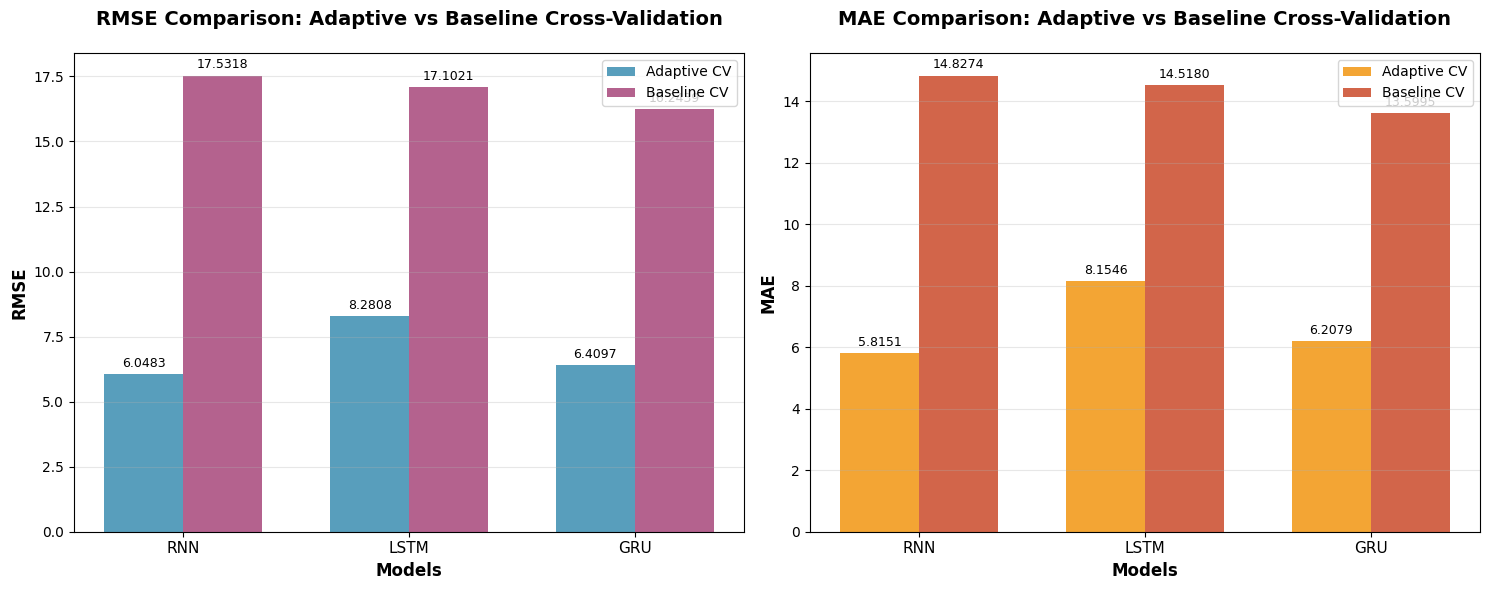

MODEL PERFORMANCE SUMMARY
Model  Adaptive RMSE  Baseline RMSE  Adaptive MAE  Baseline MAE  RMSE Improvement (%)  MAE Improvement (%)
  RNN         6.0483        17.5318        5.8151       14.8274               65.5010              60.7814
 LSTM         8.2808        17.1021        8.1546       14.5180               51.5802              43.8311
  GRU         6.4097        16.2439        6.2079       13.5995               60.5409              54.3520

Best Model (RMSE): RNN with 6.0483
Best Model (MAE): RNN with 5.8151


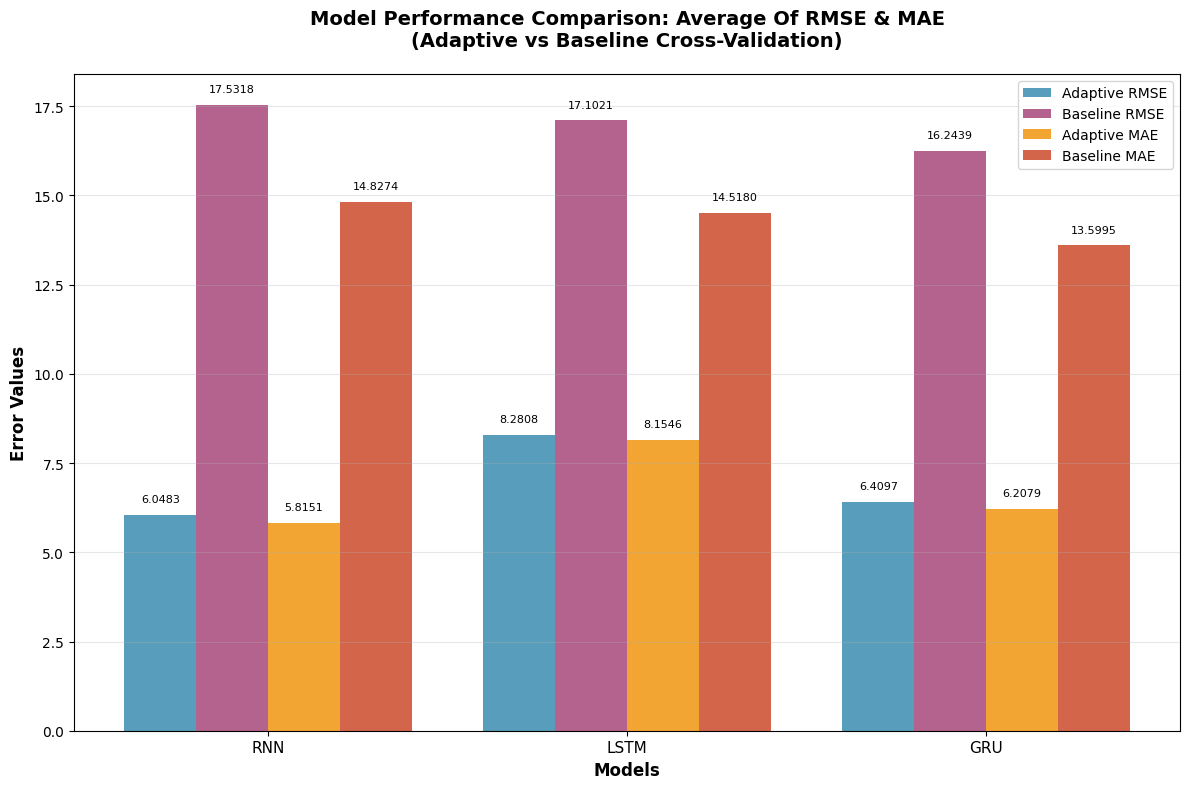

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data from your model comparison results
models = ['RNN', 'LSTM', 'GRU']

# RMSE results
adaptive_rmse = [6.0483, 8.2808, 6.4097]
baseline_rmse = [17.5318, 17.1021, 16.2439]

# MAE results
adaptive_mae = [5.8151, 8.1546, 6.2079]
baseline_mae = [14.8274, 14.5180, 13.5995]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Set up bar positions
x = np.arange(len(models))
width = 0.35

# Plot RMSE comparison
bars1 = ax1.bar(x - width/2, adaptive_rmse, width, label='Adaptive CV', color='#2E86AB', alpha=0.8)
bars2 = ax1.bar(x + width/2, baseline_rmse, width, label='Baseline CV', color='#A23B72', alpha=0.8)

# Customize RMSE plot
ax1.set_xlabel('Models', fontsize=12, fontweight='bold')
ax1.set_ylabel('RMSE', fontsize=12, fontweight='bold')
ax1.set_title('RMSE Comparison: Adaptive vs Baseline Cross-Validation', fontsize=14, fontweight='bold', pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels(models, fontsize=11)
ax1.legend(fontsize=10)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax1.annotate(f'{height:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

# Plot MAE comparison
bars3 = ax2.bar(x - width/2, adaptive_mae, width, label='Adaptive CV', color='#F18F01', alpha=0.8)
bars4 = ax2.bar(x + width/2, baseline_mae, width, label='Baseline CV', color='#C73E1D', alpha=0.8)

# Customize MAE plot
ax2.set_xlabel('Models', fontsize=12, fontweight='bold')
ax2.set_ylabel('MAE', fontsize=12, fontweight='bold')
ax2.set_title('MAE Comparison: Adaptive vs Baseline Cross-Validation', fontsize=14, fontweight='bold', pad=20)
ax2.set_xticks(x)
ax2.set_xticklabels(models, fontsize=11)
ax2.legend(fontsize=10)
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars3:
    height = bar.get_height()
    ax2.annotate(f'{height:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

for bar in bars4:
    height = bar.get_height()
    ax2.annotate(f'{height:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Create a summary table
print("="*60)
print("MODEL PERFORMANCE SUMMARY")
print("="*60)

# Create DataFrame for better visualization
df_results = pd.DataFrame({
    'Model': models,
    'Adaptive RMSE': adaptive_rmse,
    'Baseline RMSE': baseline_rmse,
    'Adaptive MAE': adaptive_mae,
    'Baseline MAE': baseline_mae
})

# Calculate improvement percentages
df_results['RMSE Improvement (%)'] = ((df_results['Baseline RMSE'] - df_results['Adaptive RMSE']) / df_results['Baseline RMSE'] * 100).round(4)
df_results['MAE Improvement (%)'] = ((df_results['Baseline MAE'] - df_results['Adaptive MAE']) / df_results['Baseline MAE'] * 100).round(4)

print(df_results.to_string(index=False))

# Find best performing model
best_model_rmse = models[np.argmin(adaptive_rmse)]
best_model_mae = models[np.argmin(adaptive_mae)]

print(f"\nBest Model (RMSE): {best_model_rmse} with {min(adaptive_rmse):.4f}")
print(f"Best Model (MAE): {best_model_mae} with {min(adaptive_mae):.4f}")

# Alternative single plot version
plt.figure(figsize=(12, 8))

# Create grouped bar plot
x = np.arange(len(models))
width = 0.2

plt.bar(x - 1.5*width, adaptive_rmse, width, label='Adaptive RMSE', color='#2E86AB', alpha=0.8)
plt.bar(x - 0.5*width, baseline_rmse, width, label='Baseline RMSE', color='#A23B72', alpha=0.8)
plt.bar(x + 0.5*width, adaptive_mae, width, label='Adaptive MAE', color='#F18F01', alpha=0.8)
plt.bar(x + 1.5*width, baseline_mae, width, label='Baseline MAE', color='#C73E1D', alpha=0.8)

plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylabel('Error Values', fontsize=12, fontweight='bold')
plt.title('Model Performance Comparison: Average Of RMSE & MAE\n(Adaptive vs Baseline Cross-Validation)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(x, models, fontsize=11)
plt.legend(fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, model in enumerate(models):
    plt.text(i - 1.5*width, adaptive_rmse[i] + 0.3, f'{adaptive_rmse[i]:.4f}', ha='center', va='bottom', fontsize=8)
    plt.text(i - 0.5*width, baseline_rmse[i] + 0.3, f'{baseline_rmse[i]:.4f}', ha='center', va='bottom', fontsize=8)
    plt.text(i + 0.5*width, adaptive_mae[i] + 0.3, f'{adaptive_mae[i]:.4f}', ha='center', va='bottom', fontsize=8)
    plt.text(i + 1.5*width, baseline_mae[i] + 0.3, f'{baseline_mae[i]:.4f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ข้อมูลจากผลลัพธ์
folds_adaptive = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4']
folds_baseline = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

# -------------------------
# RNN
# -------------------------
rnn_rmse_adaptive = [0.3587, 1.4067, 7.7252, 14.7024]
rnn_rmse_baseline = [2.9215, 1.0615, 8.0098, 5.3486, 70.3174]

# -------------------------
# LSTM
# -------------------------
lstm_rmse_adaptive = [0.5167, 0.7270, 7.7345, 24.1448]
lstm_rmse_baseline = [2.8427, 0.8630, 7.6644, 4.8265, 69.3140]

# -------------------------
# GRU
# -------------------------
gru_rmse_adaptive = [0.4503, 0.8095, 8.7996, 15.5794]
gru_rmse_baseline = [2.6968, 1.1221, 7.4663, 4.5347, 65.3999]

# -------------------------
# Function for grouped bar plot
# -------------------------
def plot_grouped_rmse(model_name, adaptive, baseline):
    fig, ax = plt.subplots(figsize=(10, 5))

    index_adapt = np.arange(len(adaptive))
    index_base = np.arange(len(baseline))

    bar_width = 0.35

    plt.bar(index_adapt, adaptive, bar_width, label='Adaptive CV', color='mediumseagreen')
    plt.bar(index_base + bar_width + 0.5, baseline, bar_width, label='Baseline CV', color='salmon')

    plt.xlabel('Fold', fontsize=12)
    plt.ylabel('RMSE', fontsize=12)
    plt.title(f'RMSE Comparison - {model_name}', fontsize=14)
    plt.xticks(list(index_adapt) + list(index_base + bar_width + 0.5),
               folds_adaptive + folds_baseline, rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# -------------------------
# Plot for RNN, LSTM, GRU
# -------------------------
plot_grouped_rmse("RNN", rnn_rmse_adaptive, rnn_rmse_baseline)
plot_grouped_rmse("LSTM", lstm_rmse_adaptive, lstm_rmse_baseline)
plot_grouped_rmse("GRU", gru_rmse_adaptive, gru_rmse_baseline)


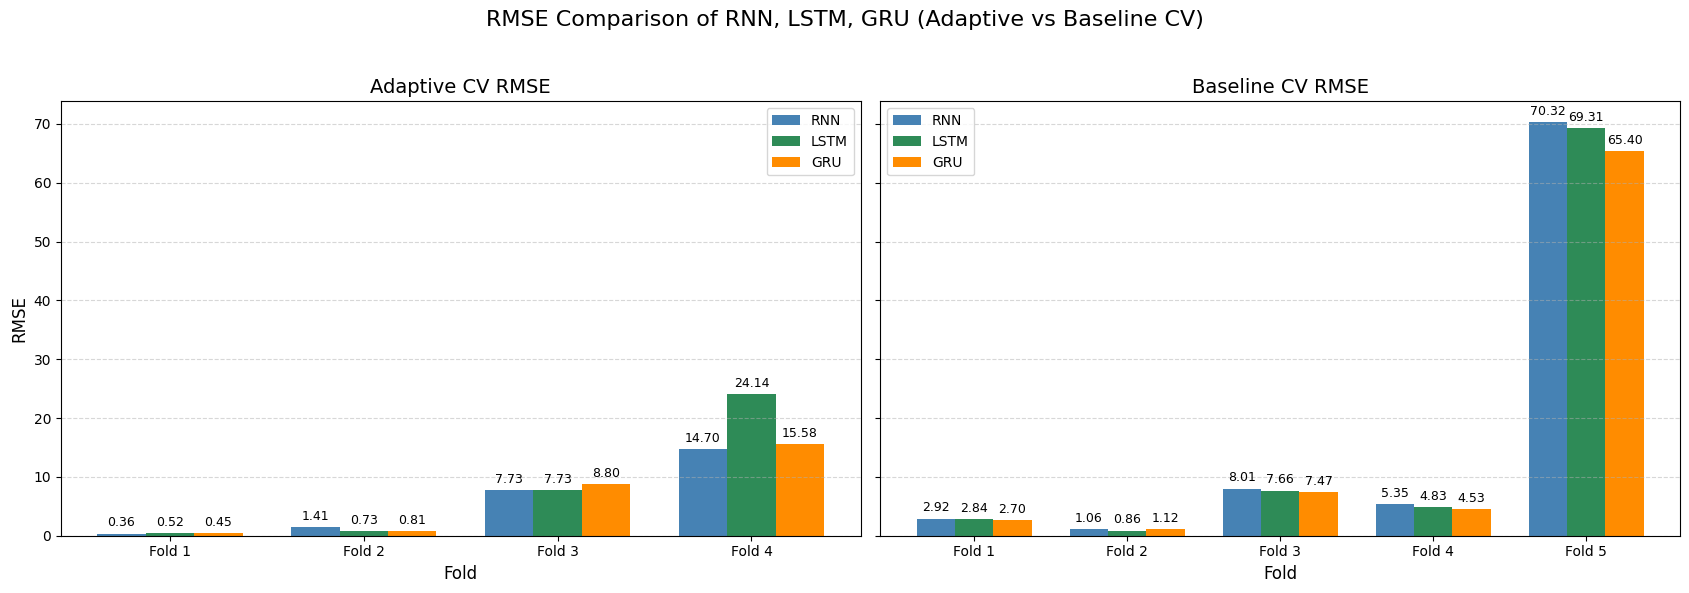

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# ข้อมูล Fold
# -------------------------
folds_adaptive = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4']
folds_baseline = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

# -------------------------
# RMSE จากผลลัพธ์
# -------------------------
rnn_adapt = [0.3587, 1.4067, 7.7252, 14.7024]
lstm_adapt = [0.5167, 0.7270, 7.7345, 24.1448]
gru_adapt = [0.4503, 0.8095, 8.7996, 15.5794]

rnn_base = [2.9215, 1.0615, 8.0098, 5.3486, 70.3174]
lstm_base = [2.8427, 0.8630, 7.6644, 4.8265, 69.3140]
gru_base = [2.6968, 1.1221, 7.4663, 4.5347, 65.3999]

# -------------------------
# Function to add value labels on bars
# -------------------------
def add_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # ยกตัวเลขขึ้นจากแท่งกราฟเล็กน้อย
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

# -------------------------
# Plot
# -------------------------
fig, axs = plt.subplots(1, 2, figsize=(17, 6), sharey=True)
bar_width = 0.25

# ---------- Adaptive CV ----------
x1 = np.arange(len(folds_adaptive))

bar1 = axs[0].bar(x1 - bar_width, rnn_adapt, bar_width, label='RNN', color='steelblue')
bar2 = axs[0].bar(x1, lstm_adapt, bar_width, label='LSTM', color='seagreen')
bar3 = axs[0].bar(x1 + bar_width, gru_adapt, bar_width, label='GRU', color='darkorange')

axs[0].set_title('Adaptive CV RMSE', fontsize=14)
axs[0].set_xlabel('Fold', fontsize=12)
axs[0].set_ylabel('RMSE', fontsize=12)
axs[0].set_xticks(x1)
axs[0].set_xticklabels(folds_adaptive)
axs[0].legend()
axs[0].grid(axis='y', linestyle='--', alpha=0.5)

# แสดงค่าบนแท่ง
add_labels(axs[0], bar1)
add_labels(axs[0], bar2)
add_labels(axs[0], bar3)

# ---------- Baseline CV ----------
x2 = np.arange(len(folds_baseline))

bar4 = axs[1].bar(x2 - bar_width, rnn_base, bar_width, label='RNN', color='steelblue')
bar5 = axs[1].bar(x2, lstm_base, bar_width, label='LSTM', color='seagreen')
bar6 = axs[1].bar(x2 + bar_width, gru_base, bar_width, label='GRU', color='darkorange')

axs[1].set_title('Baseline CV RMSE', fontsize=14)
axs[1].set_xlabel('Fold', fontsize=12)
axs[1].set_xticks(x2)
axs[1].set_xticklabels(folds_baseline)
axs[1].legend()
axs[1].grid(axis='y', linestyle='--', alpha=0.5)

# แสดงค่าบนแท่ง
add_labels(axs[1], bar4)
add_labels(axs[1], bar5)
add_labels(axs[1], bar6)

# ---------- Overall Layout ----------
plt.suptitle("RMSE Comparison of RNN, LSTM, GRU (Adaptive vs Baseline CV)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
